In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, accuracy_score, f1_score, roc_auc_score,plot_confusion_matrix,confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
#from sklearn.ensemble import StackingRegressor
#from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import ElasticNet
%matplotlib inline
from sklearn.ensemble import AdaBoostRegressor
import statsmodels.api as sm
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from sklearn.model_selection import GridSearchCV

In [3]:
BD= pd.read_excel("C:/Users/USUARIO/Desktop/Tarea3/BD.xlsx")

In [4]:
BD.head(5)

,Aceptado,Genero,ingresos,Activos,Unnamed: 4,Unnamed: 5
0,0,H,612030,6984966,NaN,NaN
1,0,M,740910,8750057,NaN,NaN
2,0,H,613001,12635092,NaN,NaN
3,0,H,620337,1832177,NaN,NaN
4,0,M,714533,5419551,NaN,NaN


In [5]:
colquitar=["Unnamed: 4","Unnamed: 5"]
BD.drop(colquitar, axis=1,inplace=True)

In [6]:
BD.head(5)

,Aceptado,Genero,ingresos,Activos
0,0,H,612030,6984966
1,0,M,740910,8750057
2,0,H,613001,12635092
3,0,H,620337,1832177
4,0,M,714533,5419551


In [7]:
#Validar NA
BD.isna().sum()

Aceptado    0
Genero      0
ingresos    0
Activos     0
dtype: int64

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ingresos'>

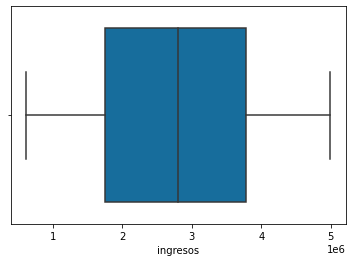

In [8]:
#Observar variables cuantitativas
sns.boxplot(BD['ingresos'],palette="colorblind")

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Activos'>

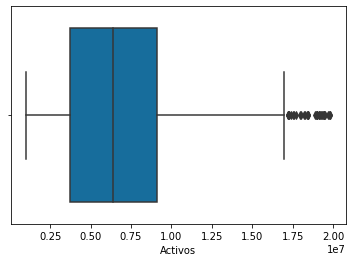

In [9]:
#se observa una cola pesada a la derecha
sns.boxplot(BD['Activos'],palette="colorblind")

In [10]:
#Variables Dummies
coldummis=['Genero']
coldummis

['Genero']

In [11]:
BD1=pd.get_dummies(BD[coldummis])
pd.DataFrame(BD1)
BD1.head(10)

,Genero_H,Genero_M
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [12]:
BD.drop(coldummis,axis=1, inplace=True)
df= pd.concat([BD,BD1], axis=1)
df.head(10)

,Aceptado,ingresos,Activos,Genero_H,Genero_M
0,0,612030,6984966,1,0
1,0,740910,8750057,0,1
2,0,613001,12635092,1,0
3,0,620337,1832177,1,0
4,0,714533,5419551,0,1
5,0,629576,8409569,1,0
6,0,664875,16872728,1,0
7,0,665566,2715937,1,0
8,0,670999,6508021,0,1
9,0,671211,17226716,1,0


In [13]:
df.to_excel("Base_Dummy.xlsx") 

In [14]:
names= df.columns
min_max_scaler = preprocessing.MinMaxScaler()
BD_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(BD_scaled)
df.columns= names
df.head(10)

,Aceptado,ingresos,Activos,Genero_H,Genero_M
0,0.0,0.000000,0.317836,1.0,0.0
1,0.0,0.029424,0.411673,0.0,1.0
2,0.0,0.000222,0.618213,1.0,0.0
3,0.0,0.001897,0.043899,1.0,0.0
4,0.0,0.023402,0.234614,0.0,1.0
5,0.0,0.004006,0.393572,1.0,0.0
6,0.0,0.012065,0.843497,1.0,0.0
7,0.0,0.012223,0.090883,1.0,0.0
8,0.0,0.013463,0.292480,0.0,1.0
9,0.0,0.013511,0.862316,1.0,0.0


In [15]:
df.to_excel("Base_MinMax.xlsx") 

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Activos'>

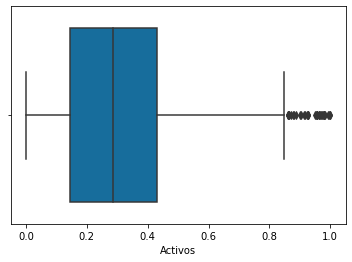

In [16]:
#Misma distribución pero en una escala más entendible 
sns.boxplot(df['Activos'],palette="colorblind")

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ingresos'>

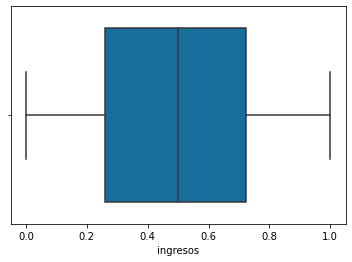

In [17]:
#Misma distribución pero en una escala más entendible 
sns.boxplot(df['ingresos'],palette="colorblind")

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ingresos', ylabel='Density'>

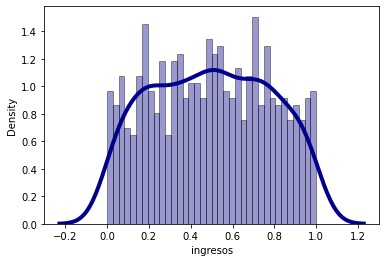

In [18]:
sns.distplot(df['ingresos'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Activos', ylabel='Density'>

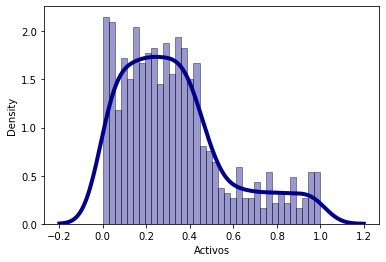

In [19]:
sns.distplot(df['Activos'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

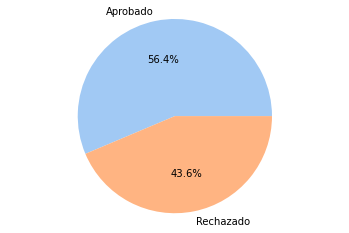

In [20]:
#pie
colors = sns.color_palette('pastel')[0:2]
Datos = [sum(df['Aceptado']==1),sum(df['Aceptado']==0)]
nombres = ["Aprobado","Rechazado"]
plt.pie(Datos, labels = nombres, colors = colors, autopct='%.01f%%')
plt.axis("equal")
plt.show()

In [21]:
Datos_h=df[df["Genero_H"]>0]
Datos_h.head()

,Aceptado,ingresos,Activos,Genero_H,Genero_M
0,0.0,0.000000,0.317836,1.0,0.0
2,0.0,0.000222,0.618213,1.0,0.0
3,0.0,0.001897,0.043899,1.0,0.0
5,0.0,0.004006,0.393572,1.0,0.0
6,0.0,0.012065,0.843497,1.0,0.0


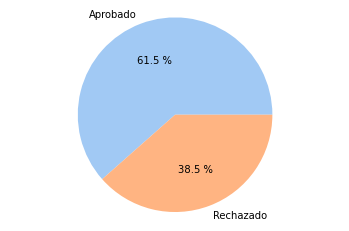

In [22]:
Datos = [sum(Datos_h['Aceptado']==1),sum(Datos_h['Aceptado']==0)]
nombres = ["Aprobado","Rechazado"]
plt.pie(Datos, labels=nombres, autopct="%0.1f %%",colors = colors)
plt.axis("equal")
plt.show()

In [23]:
Datos_m=df[df["Genero_M"]>0]
Datos_m.head()

,Aceptado,ingresos,Activos,Genero_H,Genero_M
1,0.0,0.029424,0.411673,0.0,1.0
4,0.0,0.023402,0.234614,0.0,1.0
8,0.0,0.013463,0.292480,0.0,1.0
20,0.0,0.036113,0.374368,0.0,1.0
21,0.0,0.037009,0.032852,0.0,1.0


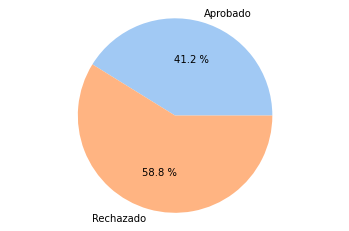

In [24]:
Datos = [sum(Datos_m['Aceptado']==1),sum(Datos_m['Aceptado']==0)]
nombres = ["Aprobado","Rechazado"]
plt.pie(Datos, labels=nombres, autopct="%0.1f %%", colors = colors)
plt.axis("equal")
plt.show()

In [25]:
# Semilla para obtener los mismos datos
random.seed(10)

In [26]:
#Cargar modelos
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Aceptado'], axis=1), df.Aceptado, random_state=42,  test_size=0.3)

In [109]:
#Ajustando KNN
KNN = KNeighborsClassifier()
Num_Vecinos = list(range(1, 20))
param_grid = dict(n_neighbors=Num_Vecinos)

# Se define los parametros 
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# Se entrena el modelo
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


In [110]:
# Mejores hiperparámetros
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy de mejor número de vecinos : {:.2f}%".format(accuracy) )

{'n_neighbors': 1}
Accuracy de mejor número de vecinos : 96.58%


In [410]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [411]:
#se observa un buen ajuste del modelo
y_train_pred_ej = KNN.predict(X_train)
y_test_pred_ej = KNN.predict(X_test)

r2_train_ej = r2_score(y_true=y_train, y_pred= y_train_pred_ej)
r2_test_ej = r2_score(y_true=y_test, y_pred= y_test_pred_ej)
print('r2 para KNN en train {:.4f}'.format(r2_train_ej))
print('r2 para KNN  en test {:.4f}'.format(r2_test_ej))


f1_train_ej = f1_score(y_true=y_train, y_pred= y_train_pred_ej)
f1_test_ej = f1_score(y_true=y_test, y_pred= y_test_pred_ej)
print('f1 para KNN en train {:.4f}'.format(f1_train_ej))
print('f1 para KNN  en test {:.4f}'.format(f1_test_ej))

Ac_train_ej = accuracy_score(y_true=y_train, y_pred= y_train_pred_ej)
Ac_test_ej = accuracy_score(y_true=y_test, y_pred= y_test_pred_ej)
print('Accuracy para KNN en train {:.4f}'.format(Ac_train_ej))
print('Accuracy para KNN  en test {:.4f}'.format(Ac_test_ej))



r2 para KNN en train 1.0000
r2 para KNN  en test 0.8592
f1 para KNN en train 1.0000
f1 para KNN  en test 0.9680
Accuracy para KNN en train 1.0000
Accuracy para KNN  en test 0.9652


In [130]:
#Ajustando Árbol de clasificación 
AC= DecisionTreeClassifier()
tree_para = {'criterion':['gini','entropy'],'max_depth':list(range(1, 100))}
Arbol= GridSearchCV(AC, tree_para, cv=10, scoring='accuracy')

# Se entrena el modelo
grid_search=Arbol.fit(X_train, y_train)

In [131]:
# Mejores hiperparámetros
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy mejores parámetros : {:.2f}%".format(accuracy) )

{'criterion': 'gini', 'max_depth': 4}
Accuracy mejores parámetros : 99.79%


In [412]:
AC= DecisionTreeClassifier(criterion="gini", max_depth=4)

In [413]:
AC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [414]:
#Beun ajuste.
y_train_pred_ej_2 = AC.predict(X_train)
y_test_pred_ej_2 = AC.predict(X_test)

r2_train_ej_2 = r2_score(y_true=y_train, y_pred= y_train_pred_ej_2)
r2_test_ej_2 = r2_score(y_true=y_test, y_pred= y_test_pred_ej_2)

print('r2 para Árboles de Clasificación en train {:.4f}'.format(r2_train_ej_2))
print('r2 para Árboles de Clasificación  en test {:.4f}'.format(r2_test_ej_2))

f1_train_ej_2 = f1_score(y_true=y_train, y_pred= y_train_pred_ej_2)
f1_test_ej_2 = f1_score(y_true=y_test, y_pred= y_test_pred_ej_2)
print('f1 para Árboles de Clasificación en train {:.4f}'.format(f1_train_ej_2))
print('f1 para Árboles de Clasificación  en test {:.4f}'.format(f1_test_ej_2))

Ac_train_ej_2 = accuracy_score(y_true=y_train, y_pred= y_train_pred_ej_2)
Ac_test_ej_2 = accuracy_score(y_true=y_test, y_pred= y_test_pred_ej_2)
print('Accuracy para Árboles de Clasificación en train {:.4f}'.format(Ac_train_ej_2))
print('Accuracy para Árboles de Clasificación en test {:.4f}'.format(Ac_train_ej_2))




r2 para Árboles de Clasificación en train 1.0000
r2 para Árboles de Clasificación  en test 0.9799
f1 para Árboles de Clasificación en train 1.0000
f1 para Árboles de Clasificación  en test 0.9955
Accuracy para Árboles de Clasificación en train 1.0000
Accuracy para Árboles de Clasificación en test 1.0000


In [198]:
#SVM
#Dado que el resultado obtenido es un polinomio de grado 4, y considerando la base de datos propuesta, 
#se considera realizar el gridsearch de otra forma

param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(SVC(),param_grid, cv=10, scoring='accuracy')
grid.fit(X_train,y_train)

print(grid.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy mejores parámetros : {:.2f}%".format(accuracy) )

{'C': 1000, 'degree': 5, 'gamma': 1, 'kernel': 'poly'}
Accuracy mejores parámetros : 98.94%


In [208]:
#Se observa su ajuste
SVC_model=SVC(kernel='poly', C=1000, gamma=1, degree=5)
SVC_model.fit(X_train, y_train)
y_train_pred_ej_3 = SVC_model.predict(X_train)
y_test_pred_ej_3 = SVC_model.predict(X_test)

r2_train_ej_3 = r2_score(y_true=y_train, y_pred= y_train_pred_ej_3)
r2_test_ej_3 = r2_score(y_true=y_test, y_pred= y_test_pred_ej_3)

print('r2 para SVM en train {:.4f}'.format(r2_train_ej_3))
print('r2 para SVM   en test {:.4f}'.format(r2_test_ej_3))

f1_train_ej_3 = f1_score(y_true=y_train, y_pred= y_train_pred_ej_3)
f1_test_ej_3 = f1_score(y_true=y_test, y_pred= y_test_pred_ej_3)
print('f1 para SVM  en train {:.4f}'.format(f1_train_ej_3))
print('f1 para SVM   en test {:.4f}'.format(f1_test_ej_3))

Ac_train_ej_3 = accuracy_score(y_true=y_train, y_pred= y_train_pred_ej_3)
Ac_test_ej_3 = accuracy_score(y_true=y_test, y_pred= y_test_pred_ej_3)
print('Accuracy para SVM  en train {:.4f}'.format(Ac_train_ej_3))
print('Accuracy para SVM en test {:.4f}'.format(Ac_train_ej_3))

r2 para SVM en train 0.9565
r2 para SVM   en test 0.9396
f1 para SVM  en train 0.9906
f1 para SVM   en test 0.9863
Accuracy para SVM  en train 0.9893
Accuracy para SVM en test 0.9893


In [191]:
#kernels
from sklearn.svm import SVC  
#Primero los kernels
kernels = ['Polinomio', 'RBF', 'Sigmoide','Lineal']
def Definir_kernel(tipo):
    if tipo == 0:
        # Polinomio
        return SVC(kernel='poly', degree=5, gamma=1, C=1000)
    elif tipo == 1:
        # función de base radial
        return SVC(kernel='rbf', gamma=1, C=1000)
    elif tipo == 2:
        # Sigmoide
        return SVC(kernel='sigmoid',gamma=1, C=1000)
    elif tipo == 3:
        # Lineal
        return SVC(kernel='linear', gamma=1, C=1000)

In [192]:
#Evaluar diferentes kernels en test
for i in range(4):
    svclassifier = Definir_kernel(i) 
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("Evaluación del kernel :",kernels[i])
    sv_mod = accuracy_score(y_true=y_test, y_pred= y_pred)
    print('Accuracy para SVM en test {:.4f}'.format(sv_mod))

Evaluación del kernel : Polinomio
Accuracy para SVM en test 0.9851
Evaluación del kernel : RBF
Accuracy para SVM en test 0.9851
Evaluación del kernel : Sigmoide
Accuracy para SVM en test 0.7065
Evaluación del kernel : Lineal
Accuracy para SVM en test 0.8905


In [196]:
#rbf
# Parámetros
param_grid = {'C': list(np.logspace(0, 10, 13)),
              'gamma':list(np.logspace(-9, 3, 13)),
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
 
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

# Mejores hiperparámetros
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy mejor rbf SVM : {:.2f}%".format(accuracy) )

Fitting 10 folds for each of 169 candidates, totalling 1690 fits
{'C': 681292.0690579622, 'gamma': 1.0, 'kernel': 'rbf'}
Accuracy mejor rbf SVM : 98.94%


In [202]:
#poli
# Parámetros
param_grid = {'C': list(np.logspace(0, 10, 13))}
grid = GridSearchCV(SVC(kernel="poly", degree=5,gamma=1), param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
 
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

# Mejores hiperparámetros
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy mejor rbf SVM : {:.2f}%".format(accuracy) )

Fitting 10 folds for each of 13 candidates, totalling 130 fits
{'C': 100000.0}
Accuracy mejor rbf SVM : 98.94%


In [186]:
#para rbf
SVC_model=SVC(kernel='rbf', C=681292.0690579622, gamma=1)
SVC_model.fit(X_train, y_train)
y_train_pred_ej_3 = SVC_model.predict(X_train)
y_test_pred_ej_3 = SVC_model.predict(X_test)

r2_train_ej_3 = r2_score(y_true=y_train, y_pred= y_train_pred_ej_3)
r2_test_ej_3 = r2_score(y_true=y_test, y_pred= y_test_pred_ej_3)

print('r2 para SVM en train {:.4f}'.format(r2_train_ej_3))
print('r2 para SVM   en test {:.4f}'.format(r2_test_ej_3))

f1_train_ej_3 = f1_score(y_true=y_train, y_pred= y_train_pred_ej_3)
f1_test_ej_3 = f1_score(y_true=y_test, y_pred= y_test_pred_ej_3)
print('f1 para SVM  en train {:.4f}'.format(f1_train_ej_3))
print('f1 para SVM   en test {:.4f}'.format(f1_test_ej_3))

Ac_train_ej_3 = accuracy_score(y_true=y_train, y_pred= y_train_pred_ej_3)
Ac_test_ej_3 = accuracy_score(y_true=y_test, y_pred= y_test_pred_ej_3)
print('Accuracy para SVM  en train {:.4f}'.format(Ac_train_ej_3))
print('Accuracy para SVM en test {:.4f}'.format(Ac_train_ej_3))

r2 para Árboles de Clasificación en train 1.0000
r2 para Árboles de Clasificación  en test 0.9396
f1 para Árboles de Clasificación en train 1.0000
f1 para Árboles de Clasificación  en test 0.9864
Accuracy para Árboles de Clasificación en train 1.0000
Accuracy para Árboles de Clasificación en test 1.0000


In [415]:
#para poli
SVC_model=SVC(kernel='poly', degree=5 ,C=100000, gamma=1)
SVC_model.fit(X_train, y_train)

y_train_pred_ej_3 = SVC_model.predict(X_train)
y_test_pred_ej_3 = SVC_model.predict(X_test)

r2_train_ej_3 = r2_score(y_true=y_train, y_pred= y_train_pred_ej_3)
r2_test_ej_3 = r2_score(y_true=y_test, y_pred= y_test_pred_ej_3)

print('r2 para SVM en train {:.4f}'.format(r2_train_ej_3))
print('r2 para SVM   en test {:.4f}'.format(r2_test_ej_3))

f1_train_ej_3 = f1_score(y_true=y_train, y_pred= y_train_pred_ej_3)
f1_test_ej_3 = f1_score(y_true=y_test, y_pred= y_test_pred_ej_3)
print('f1 para SVM  en train {:.4f}'.format(f1_train_ej_3))
print('f1 para SVM   en test {:.4f}'.format(f1_test_ej_3))

Ac_train_ej_3 = accuracy_score(y_true=y_train, y_pred= y_train_pred_ej_3)
Ac_test_ej_3 = accuracy_score(y_true=y_test, y_pred= y_test_pred_ej_3)
print('Accuracy para SVM  en train {:.4f}'.format(Ac_train_ej_3))
print('Accuracy para SVM en test {:.4f}'.format(Ac_train_ej_3))

r2 para SVM en train 1.0000
r2 para SVM   en test 0.9396
f1 para SVM  en train 1.0000
f1 para SVM   en test 0.9864
Accuracy para SVM  en train 1.0000
Accuracy para SVM en test 1.0000


In [416]:
#KNN
Confu_matrix_KNN=pd.DataFrame(confusion_matrix(y_true=y_test, y_pred= y_test_pred_ej))
Confu_matrix_KNN

,0,1
0,88,2
1,5,106


In [417]:
#AC
Confu_matrix_AC=pd.DataFrame(confusion_matrix(y_true=y_test, y_pred= y_test_pred_ej_2))
Confu_matrix_AC

,0,1
0,89,1
1,0,111


In [419]:
#SVM
Confu_matrix_SVM=pd.DataFrame(confusion_matrix(y_true=y_test, y_pred= y_test_pred_ej_3))
Confu_matrix_SVM

,0,1
0,89,1
1,2,109


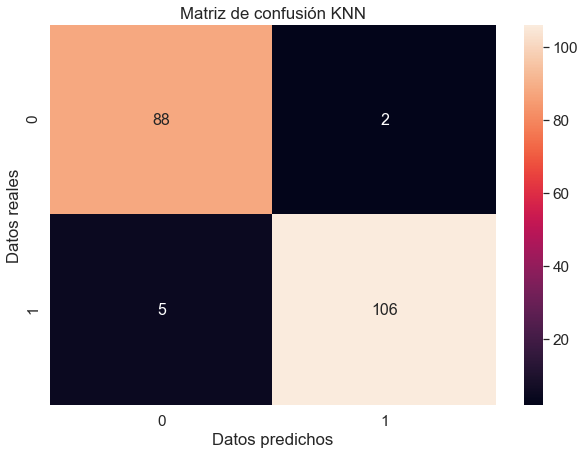

In [422]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(Confu_matrix_KNN, annot=True, annot_kws={"size": 16},
           fmt='g') 
plt.title("Matriz de confusión KNN")
plt.ylabel('Datos reales')
plt.xlabel('Datos predichos')
plt.show()

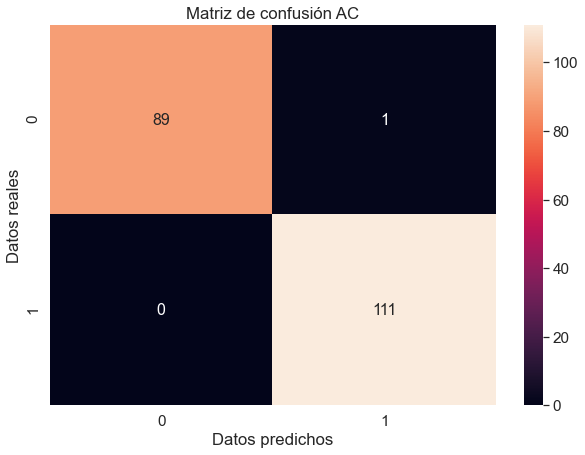

In [423]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(Confu_matrix_AC, annot=True, annot_kws={"size": 16},
           fmt='g') 
plt.title("Matriz de confusión AC")
plt.ylabel('Datos reales')
plt.xlabel('Datos predichos')
plt.show()

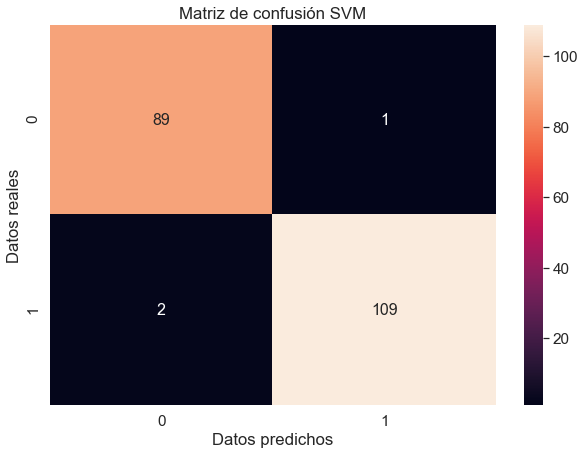

In [424]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(Confu_matrix_SVM, annot=True, annot_kws={"size": 16},
           fmt='g') 
plt.title("Matriz de confusión SVM")
plt.ylabel('Datos reales')
plt.xlabel('Datos predichos')
plt.show()

[Text(111.60000000000001, 195.696, 'X[1] <= 0.213\ngini = 0.491\nsamples = 468\nvalue = [202, 266]'),
 Text(55.800000000000004, 152.208, 'gini = 0.0\nsamples = 178\nvalue = [178, 0]'),
 Text(167.4, 152.208, 'X[0] <= 0.088\ngini = 0.152\nsamples = 290\nvalue = [24, 266]'),
 Text(111.60000000000001, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(223.20000000000002, 108.72, 'X[0] <= 0.202\ngini = 0.029\nsamples = 270\nvalue = [4, 266]'),
 Text(167.4, 65.232, 'X[3] <= 0.5\ngini = 0.213\nsamples = 33\nvalue = [4, 29]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(279.0, 65.232, 'gini = 0.0\nsamples = 237\nvalue = [0, 237]')]

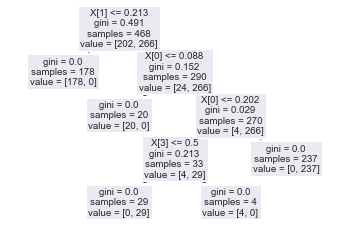

In [283]:
tree.plot_tree(AC)

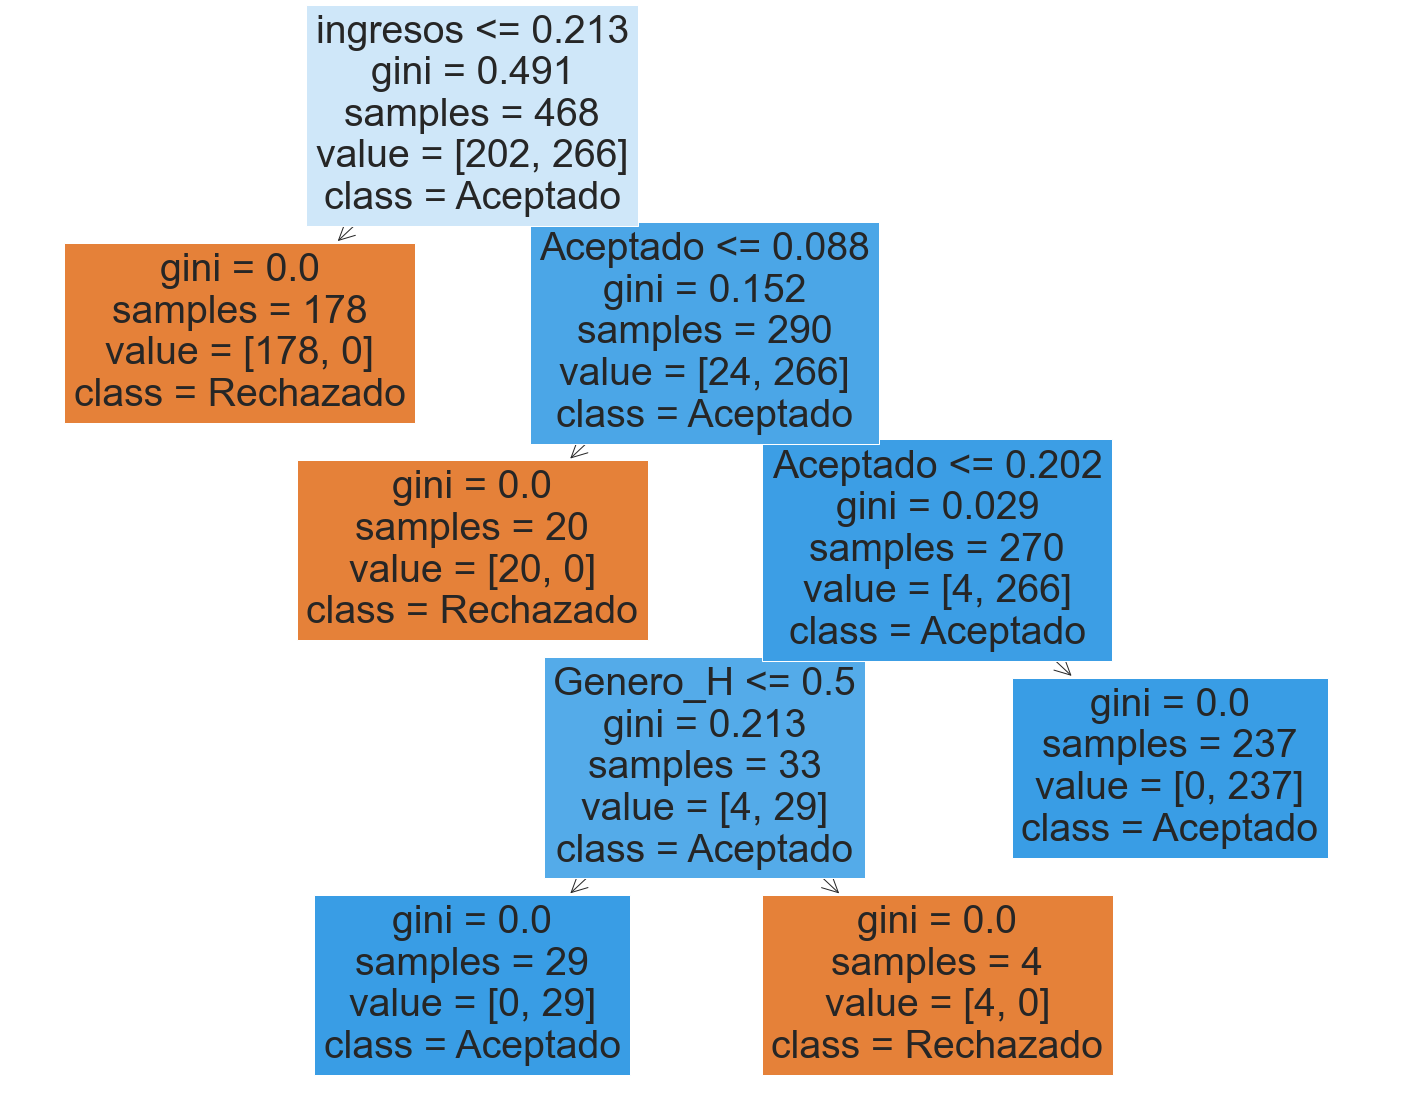

In [284]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(AC,
                   feature_names=list(df.columns.values),
                   class_names=list(("Rechazado","Aceptado")),
                   filled=True)

In [358]:
#Correlación en test
X_test_2= X_test.copy()
X_test_2["Aprobado KNN"]=y_test_pred_ej
X_test_2["Aprobado AC "]=y_test_pred_ej_2
X_test_2["Aprobado SVM "]=y_test_pred_ej_3
df_H= pd.DataFrame(data=X_test_2)

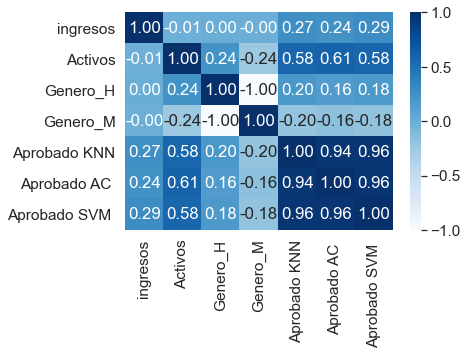

In [359]:
correlation_mat = df_H.corr()
sns.heatmap(correlation_mat, annot = True, cmap="Blues",fmt='.2f')
plt.show()

In [378]:
#Total aprobados
#KNN
Aprobados=X_test_2["Aprobado KNN"].sum()
Solicitados= len(X_test_2["Aprobado KNN"])
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados KNN {:.3f}'.format(Aprobados))
print('Número de créditos aprobados KNN {:.4f}'.format(Ratio))

Número de créditos aprobados KNN 108.000
Número de créditos aprobados KNN 0.5373


In [379]:
#AC
Aprobados=X_test_2["Aprobado AC "].sum()
Solicitados= len(X_test_2["Aprobado AC "])
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados AC {:.3f}'.format(Aprobados))
print('Número de créditos aprobados AC {:.4f}'.format(Ratio))

Número de créditos aprobados AC 112.000
Número de créditos aprobados AC 0.5572


In [381]:
#SVM
Aprobados=X_test_2["Aprobado SVM "].sum()
Solicitados= len(X_test_2["Aprobado SVM "])
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados SVM {:.3f}'.format(Aprobados))
print('Número de créditos aprobados SVM hombres {:.4f}'.format(Ratio))

Número de créditos aprobados SVM 108.000
Número de créditos aprobados SVM hombres 0.5373


In [367]:
#sólo hombres
Base_H=X_test_2[X_test_2["Genero_H"]>0]
Base_H.head()

,ingresos,Activos,Genero_H,Genero_M,Aprobado KNN,Aprobado AC,Aprobado SVM
361,0.534807,0.156212,1.0,0.0,0.0,0.0,0.0
158,0.249470,0.333915,1.0,0.0,1.0,1.0,1.0
533,0.771779,0.153250,1.0,0.0,0.0,0.0,0.0
362,0.535339,0.370726,1.0,0.0,1.0,1.0,1.0
310,0.474159,0.525019,1.0,0.0,1.0,1.0,1.0


In [362]:
#KNN
Aprobados=Base_H["Aprobado KNN"].sum()
Solicitados= len(Base_H["Aprobado KNN"])
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados KNN {:.3f}'.format(Aprobados))
print('Número de créditos aprobados KNN hombres {:.4f}'.format(Ratio))

Número de créditos aprobados 88.000
Número de créditos aprobados hombres 0.5986


In [370]:
#AC
Aprobados=Base_H["Aprobado AC "].sum()
Solicitados= len(Base_H["Aprobado AC "])
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados AC {:.3f}'.format(Aprobados))
print('Número de créditos aprobados AC hombres {:.4f}'.format(Ratio))

Número de créditos aprobados AC 89.000
Número de créditos aprobados AC hombres 0.6054


In [373]:
#SVM
Aprobados=Base_H["Aprobado SVM "].sum()
Solicitados= len(Base_H["Aprobado SVM "])
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados SVM {:.3f}'.format(Aprobados))
print('Número de créditos aprobados SVM hombres {:.4f}'.format(Ratio))

Número de créditos aprobados SVM 87.000
Número de créditos aprobados SVM hombres 0.5918


In [374]:
#sólo mujeres
Base_M=X_test_2[X_test_2["Genero_M"]>0]

,ingresos,Activos,Genero_H,Genero_M,Aprobado KNN,Aprobado AC,Aprobado SVM
478,0.700184,0.310645,0.0,1.0,1.0,1.0,1.0
275,0.417970,0.173905,0.0,1.0,0.0,0.0,0.0
90,0.157895,0.269590,0.0,1.0,0.0,0.0,0.0
354,0.526833,0.256623,0.0,1.0,1.0,1.0,1.0
211,0.325898,0.046607,0.0,1.0,0.0,0.0,0.0


In [375]:
#KNN
Aprobados=Base_M["Aprobado KNN"].sum()
Solicitados= len(Base_M["Aprobado KNN"])
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados KNN {:.3f}'.format(Aprobados))
print('Número de créditos aprobados KNN hombres {:.4f}'.format(Ratio))

Número de créditos aprobados KNN 20.000
Número de créditos aprobados KNN hombres 0.3704


In [376]:
#AC
Aprobados=Base_M["Aprobado AC "].sum()
Solicitados= len(Base_M["Aprobado AC "])
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados AC {:.3f}'.format(Aprobados))
print('Número de créditos aprobados AC hombres {:.4f}'.format(Ratio))

Número de créditos aprobados AC 23.000
Número de créditos aprobados AC hombres 0.4259


In [377]:
#SVM
Aprobados=Base_M["Aprobado SVM "].sum()
Solicitados= len(Base_M["Aprobado SVM "])
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados SVM {:.3f}'.format(Aprobados))
print('Número de créditos aprobados SVM hombres {:.4f}'.format(Ratio))

Número de créditos aprobados SVM 21.000
Número de créditos aprobados SVM hombres 0.3889


In [285]:
#Mujeres
df_M=df[df["Genero_M"]>0]
X_train, X_test, y_train, y_test = train_test_split(df_M.drop(['Aceptado'], axis=1), df_M.Aceptado, random_state=42)

In [51]:
#Se cargan los modelos
##KNN
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

SVC()

In [287]:
y_train_pred_ej_M = KNN.predict(X_train)
y_test_pred_ej_M = KNN.predict(X_test)

r2_train_ej_M = r2_score(y_true=y_train, y_pred= y_train_pred_ej_M)
r2_test_ej_M = r2_score(y_true=y_test, y_pred= y_test_pred_ej_M)

print('r2 para KNN género femenino en train {:.4f}'.format(r2_train_ej_M))
print('r2 para  KNN género femenino   en test {:.4f}'.format(r2_test_ej_M))

f1_train_ej_M = f1_score(y_true=y_train, y_pred= y_train_pred_ej_M)
f1_test_ej_M = f1_score(y_true=y_test, y_pred= y_test_pred_ej_M)

print('f1 para KNN género femenino  en train {:.4f}'.format(f1_train_ej_M))
print('f1 para  KNN género femenino  en test {:.4f}'.format(f1_test_ej_M))

Ac_train_ej_M = accuracy_score(y_true=y_train, y_pred= y_train_pred_ej_M)
Ac_test_ej_M = accuracy_score(y_true=y_test, y_pred= y_test_pred_ej_M)
print('Accuracy para  KNN género femenino  en train {:.4f}'.format(Ac_train_ej_M))
print('Accuracy para  KNN género femenino en test {:.4f}'.format(Ac_train_ej_M))

r2 para KNN género M en train 0.9340
r2 para  KNN género M   en test 0.7196
f1 para KNN género M  en train 0.9800
f1 para  KNN género M  en test 0.9189
Accuracy para  KNN género M  en train 0.9843
Accuracy para  KNN género M en test 0.9843


In [288]:
#AC
AC= DecisionTreeClassifier(criterion="gini", max_depth=4)
AC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [289]:
y_train_pred_ej_2_M = AC.predict(X_train)
y_test_pred_ej_2_M = AC.predict(X_test)

r2_train_ej_2_M = r2_score(y_true=y_train, y_pred= y_train_pred_ej_2_M)
r2_test_ej_2_M = r2_score(y_true=y_test, y_pred= y_test_pred_ej_2_M)

print('r2 para Árboles de Clasificación género femenino en train {:.4f}'.format(r2_train_ej_2_M))
print('r2 para Árboles de Clasificación género femenino en test {:.4f}'.format(r2_test_ej_2_M))

f1_train_ej_2_M = f1_score(y_true=y_train, y_pred= y_train_pred_ej_2_M)
f1_test_ej_2_M = f1_score(y_true=y_test, y_pred= y_test_pred_ej_2_M)

print('f1 para Árboles de Clasificación género femenino en train {:.4f}'.format(f1_train_ej_2_M))
print('f1 para Árboles de Clasificación género femenino en test {:.4f}'.format(f1_test_ej_2_M))

Ac_train_ej_2_M = accuracy_score(y_true=y_train, y_pred= y_train_pred_ej_2_M)
Ac_test_ej_2_M = accuracy_score(y_true=y_test, y_pred= y_test_pred_ej_2_M)

print('Accuracy para Árboles de Clasificación género femenino en train {:.4f}'.format(Ac_train_ej_2_M))
print('Accuracy para Árboles de Clasificación género femenino en test {:.4f}'.format(Ac_train_ej_2_M))

r2 para Árboles de Clasificación género M en train 1.0000
r2 para Árboles de Clasificación género M en test 0.8130
f1 para Árboles de Clasificación género M en train 1.0000
f1 para Árboles de Clasificación género M en test 0.9474
Accuracy para Árboles de Clasificación género M en train 1.0000
Accuracy para Árboles de Clasificación género M en test 1.0000


In [ ]:
#SVM
SVC_model=SVC(kernel='poly', degree=5 ,C=100000, gamma=1)
SVC_model.fit(X_train, y_train)

In [290]:
y_train_pred_ej_3_M = SVC_model.predict(X_train)
y_test_pred_ej_3_M = SVC_model.predict(X_test)

r2_train_ej_3_M = r2_score(y_true=y_train, y_pred= y_train_pred_ej_3_M)
r2_test_ej_3_M = r2_score(y_true=y_test, y_pred= y_test_pred_ej_3_M)

print('r2 para SVM género femenino  en train {:.4f}'.format(r2_train_ej_3_M))
print('r2 para SVM  género femenino  en test {:.4f}'.format(r2_test_ej_3_M))

f1_train_ej_3_M = f1_score(y_true=y_train, y_pred= y_train_pred_ej_3_M)
f1_test_ej_3_M = f1_score(y_true=y_test, y_pred= y_test_pred_ej_3_M)

print('f1 para SVM género femenino  en train {:.4f}'.format(f1_train_ej_3_M))
print('f1 para SVM  género femenino  en test {:.4f}'.format(f1_test_ej_3_M))

Ac_train_ej_3_M = accuracy_score(y_true=y_train, y_pred= y_train_pred_ej_3_M)
Ac_test_ej_3_M = accuracy_score(y_true=y_test, y_pred= y_test_pred_ej_3_M)

print('Accuracy para SVM género femenino  en train {:.4f}'.format(Ac_train_ej_3_M))
print('Accuracy para SVM género femenino  en test {:.4f}'.format(Ac_train_ej_3_M))

r2 para SVM en train 0.9670
r2 para SVM   en test 0.7196
f1 para SVM  en train 0.9899
f1 para SVM   en test 0.9189
Accuracy para SVM  en train 0.9921
Accuracy para SVM en test 0.9921


In [293]:
#KNN
Confu_matrix_KNN=pd.DataFrame(confusion_matrix(y_true=y_test, y_pred= y_test_pred_ej_M))
Confu_matrix_KNN

,0,1
0,23,0
1,3,17


In [294]:
#AC
Confu_matrix_AC=pd.DataFrame(confusion_matrix(y_true=y_test, y_pred= y_test_pred_ej_2_M))
Confu_matrix_AC

,0,1
0,23,0
1,2,18


In [295]:
#SVM
Confu_matrix_SVM=pd.DataFrame(confusion_matrix(y_true=y_test, y_pred= y_test_pred_ej_3_M))
Confu_matrix_SVM

,0,1
0,23,0
1,3,17


In [299]:
#Se realiza el análisis de nuevo sólo  hombres
df_H=df[df["Genero_H"]>0]
X_train, X_test, y_train, y_test = train_test_split(df_H.drop(['Aceptado'], axis=1), df_H.Aceptado, random_state=42)

In [300]:
# con KNN
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [301]:
y_train_pred_ej_H = KNN.predict(X_train)
y_test_pred_ej_H = KNN.predict(X_test)

r2_train_ej_H = r2_score(y_true=y_train, y_pred= y_train_pred_ej_H)
r2_test_ej_H = r2_score(y_true=y_test, y_pred= y_test_pred_ej_H)

print('r2 para KNN género masculino en train {:.4f}'.format(r2_train_ej_H))
print('r2 para  KNN género masculino   en test {:.4f}'.format(r2_test_ej_H))

f1_train_ej_H = f1_score(y_true=y_train, y_pred= y_train_pred_ej_H)
f1_test_ej_H = f1_score(y_true=y_test, y_pred= y_test_pred_ej_H)

print('f1 para KNN género masculino  en train {:.4f}'.format(f1_train_ej_H))
print('f1 para  KNN género masculino en test {:.4f}'.format(f1_test_ej_H))

Ac_train_ej_H = accuracy_score(y_true=y_train, y_pred= y_train_pred_ej_H)
Ac_test_ej_H = accuracy_score(y_true=y_test, y_pred= y_test_pred_ej_H)
print('Accuracy para  KNN género masculino en train {:.4f}'.format(Ac_train_ej_H))
print('Accuracy para  KNN género masculino en test {:.4f}'.format(Ac_train_ej_H))

r2 para KNN género masculino en train 1.0000
r2 para  KNN género masculino   en test 0.9299
f1 para KNN género masculino  en train 1.0000
f1 para  KNN género masculino en test 0.9877
Accuracy para  KNN género masculino en train 1.0000
Accuracy para  KNN género masculino en test 1.0000


In [302]:
#AC
AC= DecisionTreeClassifier(criterion="gini", max_depth=4)
AC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [304]:
y_train_pred_ej_2_H = AC.predict(X_train)
y_test_pred_ej_2_H = AC.predict(X_test)

r2_train_ej_2_H = r2_score(y_true=y_train, y_pred= y_train_pred_ej_2_H)
r2_test_ej_2_H = r2_score(y_true=y_test, y_pred= y_test_pred_ej_2_H)

print('r2 para Árboles de Clasificación género masculino en train {:.4f}'.format(r2_train_ej_2_H))
print('r2 para Árboles de Clasificación género masculino en test {:.4f}'.format(r2_test_ej_2_H))

f1_train_ej_2_H = f1_score(y_true=y_train, y_pred= y_train_pred_ej_2_H)
f1_test_ej_2_H = f1_score(y_true=y_test, y_pred= y_test_pred_ej_2_H)

print('f1 para Árboles de Clasificación género masculino en train {:.4f}'.format(f1_train_ej_2_H))
print('f1 para Árboles de Clasificación género masculino en test {:.4f}'.format(f1_test_ej_2_H))

Ac_train_ej_2_H = accuracy_score(y_true=y_train, y_pred= y_train_pred_ej_2_H)
Ac_test_ej_2_H = accuracy_score(y_true=y_test, y_pred= y_test_pred_ej_2_H)

print('Accuracy para Árboles de Clasificación género masculino en train {:.4f}'.format(Ac_train_ej_2_H))
print('Accuracy para Árboles de Clasificación género masculino en test {:.4f}'.format(Ac_train_ej_2_H))



r2 para Árboles de Clasificación género masculino en train 1.0000
r2 para Árboles de Clasificación género masculino en test 1.0000
f1 para Árboles de Clasificación género masculino en train 1.0000
f1 para Árboles de Clasificación género masculino en test 1.0000
Accuracy para Árboles de Clasificación género masculino en train 1.0000
Accuracy para Árboles de Clasificación género masculino en test 1.0000


In [305]:
#SVM
SVC_model=SVC(kernel='poly', degree=5 ,C=100000, gamma=1)
SVC_model.fit(X_train, y_train)

SVC(C=100000, degree=5, gamma=1, kernel='poly')

In [306]:
y_train_pred_ej_3_H = SVC_model.predict(X_train)
y_test_pred_ej_3_H = SVC_model.predict(X_test)

r2_train_ej_3_H = r2_score(y_true=y_train, y_pred= y_train_pred_ej_3_H)
r2_test_ej_3_H = r2_score(y_true=y_test, y_pred= y_test_pred_ej_3_H)

print('r2 para SVM género masculino   en train {:.4f}'.format(r2_train_ej_3_H))
print('r2 para SVM  género masculino   en test {:.4f}'.format(r2_test_ej_3_H))

f1_train_ej_3_H = f1_score(y_true=y_train, y_pred= y_train_pred_ej_3_H)
f1_test_ej_3_H = f1_score(y_true=y_test, y_pred= y_test_pred_ej_3_H)

print('f1 para SVM género masculino   en train {:.4f}'.format(f1_train_ej_3_H))
print('f1 para SVM  género masculino   en test {:.4f}'.format(f1_test_ej_3_H))

Ac_train_ej_3_H = accuracy_score(y_true=y_train, y_pred= y_train_pred_ej_3_H)
Ac_test_ej_3_H = accuracy_score(y_true=y_test, y_pred= y_test_pred_ej_3_H)

print('Accuracy para SVM género masculino   en train {:.4f}'.format(Ac_train_ej_3_H))
print('Accuracy para SVM género masculino   en test {:.4f}'.format(Ac_train_ej_3_H))

r2 para SVM género femenino  en train 1.0000
r2 para SVM  género femenino  en test 0.9649
f1 para SVM género femenino  en train 1.0000
f1 para SVM  género femenino  en test 0.9939
Accuracy para SVM género femenino  en train 1.0000
Accuracy para SVM género femenino  en test 1.0000


In [308]:
#KNN
Confu_matrix_KNN=pd.DataFrame(confusion_matrix(y_true=y_test, y_pred= y_test_pred_ej_H))
Confu_matrix_KNN

,0,1
0,43,1
1,1,80


In [309]:
#AC
Confu_matrix_AC=pd.DataFrame(confusion_matrix(y_true=y_test, y_pred= y_test_pred_ej_2_H))
Confu_matrix_AC

,0,1
0,44,0
1,0,81


In [310]:
#SVM
Confu_matrix_SVM=pd.DataFrame(confusion_matrix(y_true=y_test, y_pred= y_test_pred_ej_3_H))
Confu_matrix_SVM

,0,1
0,43,1
1,0,81


In [326]:
#BASE COMPLETA
#KNN
Aprobados=y_test_pred_ej.sum()
Solicitados= len(y_test_pred_ej)
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados {:.3f}'.format(Aprobados))
print('Número de créditos aprobados base completa con KNN {:.4f}'.format(Ratio))

Número de créditos aprobados 108.000
Número de créditos aprobados base completa con KNN 0.5373


In [327]:
#AC
Aprobados=y_test_pred_ej_2.sum()
Solicitados= len(y_test_pred_ej_2)
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados {:.3f}'.format(Aprobados))
print('Número de créditos aprobados base completa con Árboles de Clasificación {:.4f}'.format(Ratio))

Número de créditos aprobados 112.000
Número de créditos aprobados base completa con Árboles de Clasificación 0.5572


In [328]:
#SVM
Aprobados=y_test_pred_ej_3.sum()
Solicitados= len(y_test_pred_ej_3)
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados {:.3f}'.format(Aprobados))
print('Número de créditos aprobados base completas con Árboles de Clasificación {:.4f}'.format(Ratio))

Número de créditos aprobados 108.000
Número de créditos aprobados base completas con Árboles de Clasificación 0.5373


In [329]:
#Ahora,observemos con datos desconocidos cuantos créditos fueron aprobados para mujeres
#KNN
Aprobados=y_test_pred_ej_M.sum()
Solicitados= len(y_test_pred_ej_M)
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados {:.3f}'.format(Aprobados))
print('Número de créditos aprobados para mujeres con KNN {:.4f}'.format(Ratio))

Número de créditos aprobados 17.000
Número de créditos aprobados para mujeres con KNN 0.3953


In [331]:
#AC
Aprobados=y_test_pred_ej_2_M.sum()
Solicitados= len(y_test_pred_ej_2_M)
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados {:.3f}'.format(Aprobados))
print('Número de créditos aprobados para mujeres con Árboles de Clasificación {:.4f}'.format(Ratio))

Número de créditos aprobados 18.000
Número de créditos aprobados para mujeres con Árboles de Clasificación 0.4186


In [335]:
#Para hombres
#KNN
Aprobados=y_test_pred_ej_H.sum()
Solicitados= len(y_test_pred_ej_H)
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados {:.3f}'.format(Aprobados))
print('Número de créditos aprobados para hombres con KNN {:.4f}'.format(Ratio))

Número de créditos aprobados 81.000
Número de créditos aprobados para hombres con KNN 0.6480


In [337]:
#AC
Aprobados=y_test_pred_ej_2_H.sum()
Solicitados= len(y_test_pred_ej_2_H)
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados {:.3f}'.format(Aprobados))
print('Número de créditos aprobados para hombres con Árboles de Clasificación {:.4f}'.format(Ratio))

Número de créditos aprobados 81.000
Número de créditos aprobados para hombres con Árboles de Clasificación 0.6480


In [338]:
#SVM
Aprobados=y_test_pred_ej_3_H.sum()
Solicitados= len(y_test_pred_ej_3_H)
Ratio=Aprobados/Solicitados
print('Número de créditos aprobados {:.3f}'.format(Aprobados))
print('Número de créditos aprobados para hombres con SVM {:.4f}'.format(Ratio))

Número de créditos aprobados 82.000
Número de créditos aprobados para hombres con SVM 0.6560
